## 1: Nhập thư viện 

In [31]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations

## 2: Làm sạch và tiền xử lý dữ liệu

### 2.1: Gộp dữ liệu 12 tháng

In [11]:
# Đường dẫn đến thư mục chứa các file CSV
path = 'D:\Study\Self study DA\Sales-Reporting-main\data'

# Tạo danh sách các file CSV trong thư mục
all_files = glob.glob(path + "/*.csv")

# Đọc và gộp tất cả các file CSV
df_list = []

for filename in all_files:
    df = pd.read_csv(filename)
    df_list.append(df)

# Gộp tất cả các dataframe lại với nhau
combined_df = pd.concat(df_list, ignore_index=True)

# Lưu dataframe đã gộp thành một file CSV mới
combined_df.to_csv('Sale2019.csv', index=False)

In [11]:
df = pd.read_csv('Sale2019.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### 2.2: Thêm cột 'Month' 

In [12]:
#Tạo cột Month được cắt từ cột Order date
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


### 2.3: Loại bỏ dữ liệu NaN hoặc Or

In [13]:
df = df.dropna(how='all')
df = df[df['Month'] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


## 3: Tạo báo cáo

### 3.1: Phân tích doanh thu theo tháng

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  object
dtypes: object(7)
memory usage: 11.3+ MB


#### Giá trị của cột Quantity Order và Price Each đang là kiểu Object sẽ không tính được tổng số tiền của đơn hàng vì vậy cần chuyển đổi kiểu dữ liệu của 2 thuộc tính trên 

In [15]:
# Đưa kiểu dữ liệu của 2 cột Quantity Order và Price Each về dạng int và float
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='float')
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

#Đưa cột Sales sang bên cạch cột Price Each để dễ nhìn
moving_column = df.pop('Sales')
df.insert(4, 'Sales', moving_column)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [16]:
# Tính tổng doanh số theo từng tháng
monthly_sales = df.groupby('Month')['Sales'].sum()

# Tìm tháng có tổng doanh số lớn nhất
max_sales_month = monthly_sales.idxmax()
max_sales_value = monthly_sales.max()

print(f'Tháng có doanh số lớn nhất: {max_sales_month}')
print(f'Doanh số của tháng đó: {max_sales_value}')

Tháng có doanh số lớn nhất: 12
Doanh số của tháng đó: 4613443.5


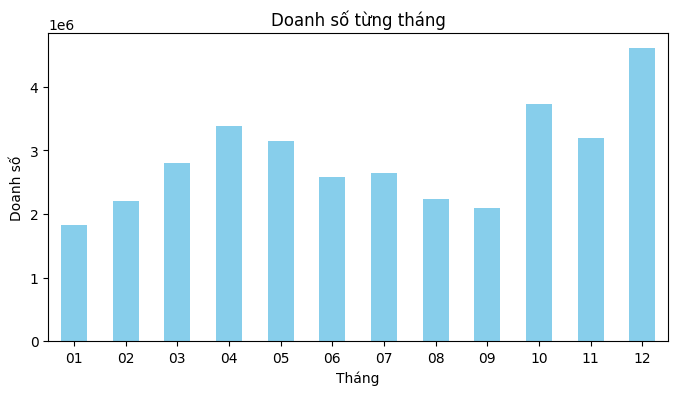

In [17]:
# Vẽ biểu đồ cột
plt.figure(figsize=(8, 4))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Doanh số từng tháng')
plt.xlabel('Tháng')
plt.ylabel('Doanh số')
plt.xticks(rotation=0)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_20272\1557104256.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


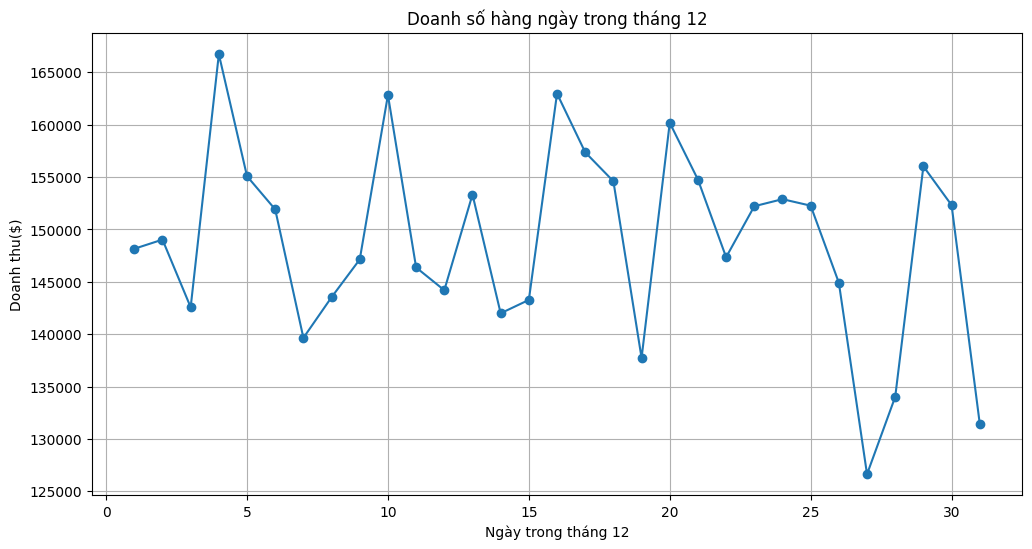

In [19]:
# Lọc dữ liệu cho tháng 12
df['Order Date'] = pd.to_datetime(df['Order Date'])
december_data = df[df['Order Date'].dt.month == 12]

# Tính tổng doanh thu cho từng ngày trong tháng 12
daily_sales_december = december_data.groupby(december_data['Order Date'].dt.day)['Sales'].sum()

# Vẽ biểu đồ doanh thu hàng ngày trong tháng 12
plt.figure(figsize=(12, 6))
plt.plot(daily_sales_december.index, daily_sales_december.values, marker='o')
plt.xlabel('Ngày trong tháng 12')
plt.ylabel('Doanh thu($)')
plt.title('Doanh số hàng ngày trong tháng 12')
plt.grid(True)
plt.show()

* Biểu đồ cho thấy sự biến động đáng kể trong doanh thu hàng ngày suốt tháng 12. Có những ngày doanh thu tăng đột biến và những ngày doanh thu giảm sâu.
* Có hai đỉnh doanh thu đáng chú ý vào khoảng ngày 3, 10 và 16 tháng 12, đạt trên 160,000 đô la. Điều này có thể liên quan đến các sự kiện mua sắm đặc biệt hoặc chiến dịch quảng cáo trong các ngày này.
* Ngày 27 có doanh thu giảm đáng kể tuy nhiên vào những ngày sau doanh thu có mức tăng vọt. Điều này có thể cho thấy sức mua khách hàng tăng vào những ngày cuối năm.


### 3.2: Doanh thu theo thành phố

In [21]:
#Tách ra một cột thành phố riêng
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin


In [22]:
# Tính tổng doanh số theo từng thành phố
city_sales = df.groupby('City')['Sales'].sum()

# Tìm thành phố có tổng doanh số lớn nhất
max_sales_city = city_sales.idxmax()
max_sales_value_city = city_sales.max()

print(f'Thành phố có doanh số lớn nhất: {max_sales_city}')
print(f'Doanh số của thành phố đó: {max_sales_value_city}')

Thành phố có doanh số lớn nhất: San Francisco
Doanh số của thành phố đó: 8262204.0


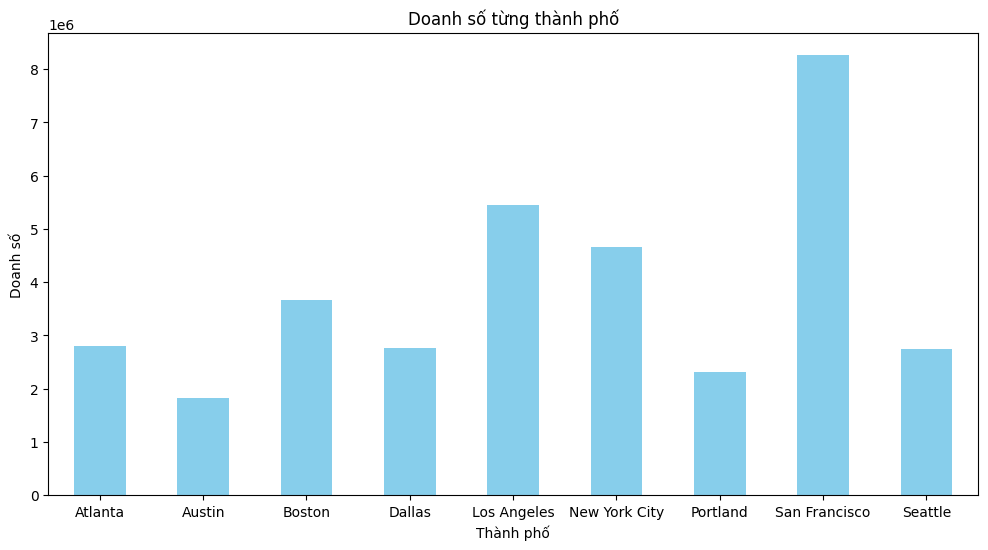

In [23]:
# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
city_sales.plot(kind='bar', color='skyblue')
plt.title('Doanh số từng thành phố')
plt.xlabel('Thành phố')
plt.ylabel('Doanh số')
plt.xticks(rotation=0)
plt.show()

### 3.3: Doanh thu theo giờ

In [24]:
#Đổi kiểu giá trị cột Order date thành dạng date time và 
df['Hours'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [25]:
# Tìm số giờ có lượng đơn hàng nhiều nhất
sales_value_hours = df.groupby('Hours').count()['Sales']
max_sales_hours = sales_value_hours.idxmax()

print(f'Giờ có lượng đơn hàng nhiều nhất là: {max_sales_hours}h')

Giờ có lượng đơn hàng nhiều nhất là: 19h


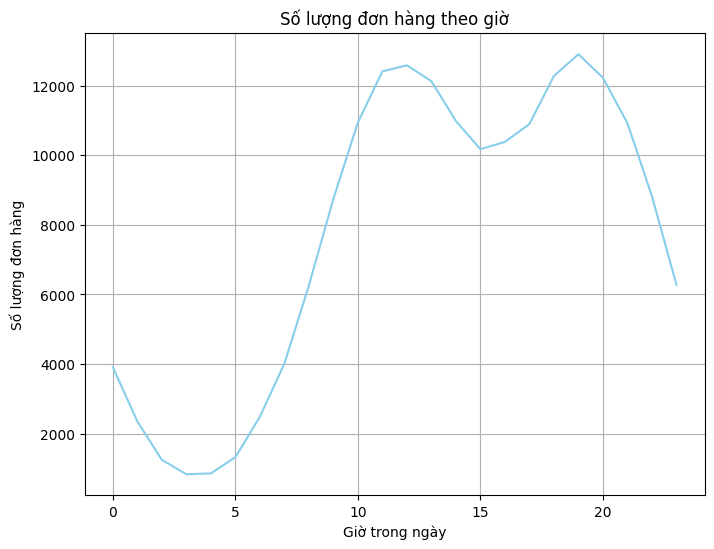

In [26]:
# Vẽ biểu đồ cột cho số lượng đơn hàng theo từng giờ
plt.figure(figsize=(8, 6))
sales_value_hours.plot(kind='line', color='skyblue')
plt.grid()
plt.title('Số lượng đơn hàng theo giờ')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng đơn hàng')
plt.xticks(rotation=0)
plt.show()

### 3.4: Các cặp sản phẩm thường được mua kèm nhau

In [27]:
# Lọc các đơn hàng trùng lặp
df_dup = df[df['Order ID'].duplicated(keep=False)]

# Nhóm các sản phẩm theo mã đơn hàng
groupProduct = lambda product: ', '.join(product)
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)

# Loại bỏ các hàng trùng lặp, chỉ giữ lại mã đơn hàng và tất cả sản phẩm trong đơn hàng đó
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()

# Đếm tần suất các cặp sản phẩm
count = Counter()

for products in df_dup['All Products']:
    product_list = products.split(", ")
    count.update(Counter(combinations(product_list, 2)))

# Chuyển đổi kết quả sang DataFrame
common_product_pairs = pd.DataFrame(count.items(), columns=['Product Pair', 'Frequency'])

# Sắp xếp bảng kết quả theo tần suất giảm dần
common_product_pairs = common_product_pairs.sort_values(by='Frequency', ascending=False)

# In bảng kết quả
print(common_product_pairs.head(10))

                                    Product Pair  Frequency
11            (iPhone, Lightning Charging Cable)       1005
3           (Google Phone, USB-C Charging Cable)        987
7                     (iPhone, Wired Headphones)        447
17              (Google Phone, Wired Headphones)        414
14       (Vareebadd Phone, USB-C Charging Cable)        361
5             (iPhone, Apple Airpods Headphones)        360
4     (Google Phone, Bose SoundSport Headphones)        220
0       (USB-C Charging Cable, Wired Headphones)        160
2            (Vareebadd Phone, Wired Headphones)        143
10  (Lightning Charging Cable, Wired Headphones)         92


C:\Users\admin\AppData\Local\Temp\ipykernel_20272\665097148.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


Dựa theo danh sách trên, cặp sản phẩm iPhone, Lightning Charging Cable và Google Phone, USB-C Charging Cable thường được mua cùng nhau. Vì vậy cửa hàng có thể bán theo từng combo với giá ưu đãi để tăng khả năng bán ra các sản phẩm này.

### 3.5: Phân tích sản phẩm

In [28]:
# Nhóm dữ liệu theo cột 'Product' và tính tổng số lượng sản phẩm đã bán
product_sales = df.groupby('Product')['Quantity Ordered'].sum().reset_index()

# Tìm sản phẩm bán chạy nhất
best_selling_product = product_sales.loc[product_sales['Quantity Ordered'].idxmax()]

print(f"Sản phẩm bán chạy nhất: {best_selling_product['Product']}, Số lượng: {best_selling_product['Quantity Ordered']}")

Sản phẩm bán chạy nhất: AAA Batteries (4-pack), Số lượng: 31017


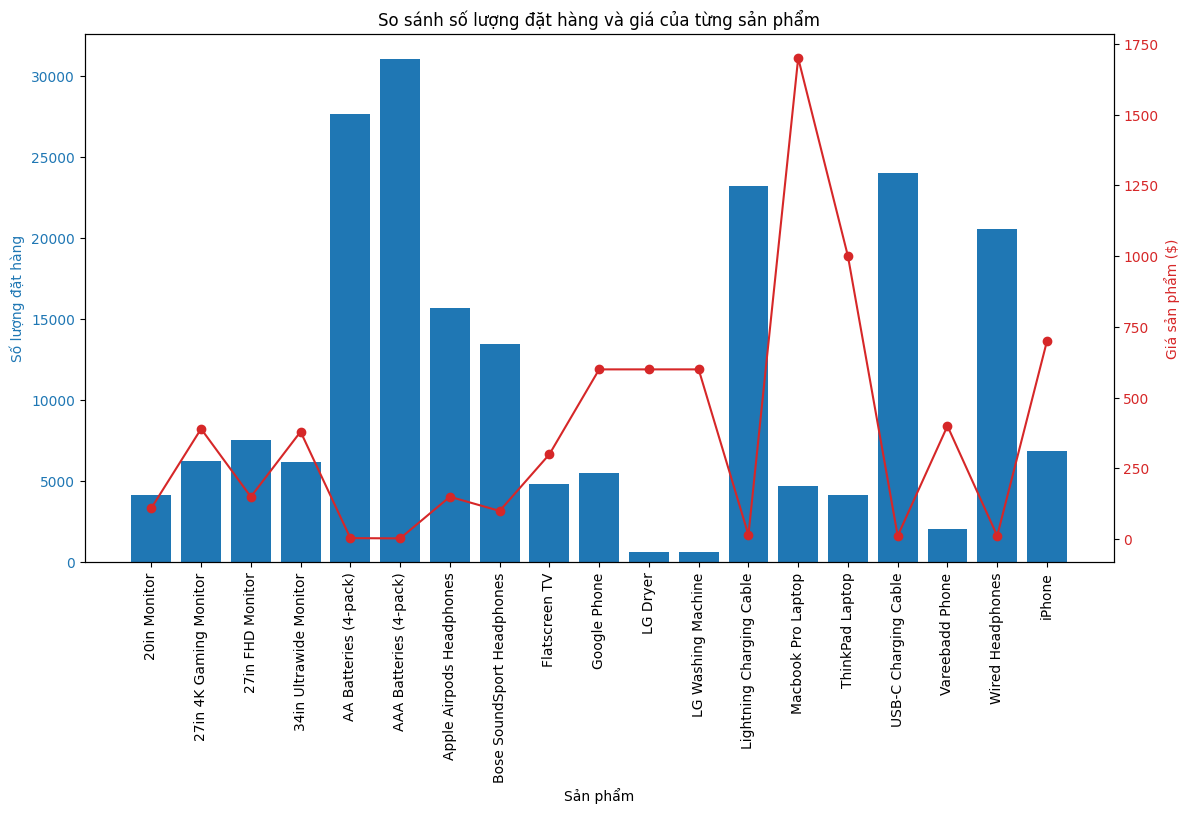

In [29]:
# Nhóm dữ liệu theo cột 'Product' và tính tổng số lượng sản phẩm đã bán và giá tiền trung bình
product_sales = df.groupby('Product').agg({
    'Quantity Ordered': 'sum',
    'Price Each': 'mean'
}).reset_index()

# Vẽ biểu đồ so sánh số lượng sản phẩm bán được và giá tiền
fig, ax1 = plt.subplots(figsize=(12, 8))

# Vẽ biểu đồ cột cho số lượng sản phẩm bán được
color = 'tab:blue'
ax1.set_xlabel('Sản phẩm')
ax1.set_ylabel('Số lượng đặt hàng', color=color)
ax1.bar(product_sales['Product'], product_sales['Quantity Ordered'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)

# Tạo một trục y thứ hai để vẽ biểu đồ cho giá tiền
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Giá sản phẩm ($)', color=color)
ax2.plot(product_sales['Product'], product_sales['Price Each'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('So sánh số lượng đặt hàng và giá của từng sản phẩm')
plt.show()

* Dựa trên biểu đồ cho thấy được, giá sản phẩm càng thấp thì số lượng bán ra càng nhiều ví dụ như 2 sản phẩm: AA Batteries và AAA Batteries. Những sản phẩm có giá cao thì số lượng mua hàng tương đối thấp.
* Các dòng sản phẩm của Apple có số lượng mua hàng khá tương đối trong khi các sản phẩm của LG có lượng mua khá thấp.

Do đó có thể đánh giá tương đối được sức mua của sản phẩm khá phụ thuộc vào giá cả và nhãn hiệu của sản phẩm